#                        Projet sur les cantines

### 1 - Consignes et livrables

Travail de groupe de 3 personnes. 

Pour l'évaluation CC, chaque groupe doit livrer à la fin des sessions :

    - un rapport synthétisant l'analyse faite et les conculusions obtenues
    
    - un notebook nettoyé et commenté

### 2 - Brief du projet 

   
La cuisine centrale de Nantes Métropole produit par jour entre 15 000 et 16 000 repas qui sont livrés dans 87 établissements. Les familles ont la
possibilité d’inscrire ou non les enfants le jour même. 

Ce système entraine une grande variabilité dans la fréquentation. Celle-ci est eCectivement
impactée  par  le  contexte  sanitaire,  la  composition  des  menus,  le  jour  de  la  semaine,  la  période  de  l’année...  

Cette  variabilité  contraint  les
cantines, très en amont (S-3), à estimer systématiquement le nombre de convives. Ces estimations servent à évaluer les quantités à commander
aux fournisseurs. Un constat : le gaspillage alimentaire sur l’ensemble de la métropole est passée de 5% en moyenne entre 2011 et 2016 à 8% sur
2017-2019.

En tant que responsable des finances de la cuisine, vous voulez réduire ce gaspillage de surproduction pour faire des économies.  Un repas coûte en matière première 3 euros. 

Vous allez donc analyser les données afin de trouver les facteurs qui influencent la fréquentation des cantines et essayer de proposer une solution pour réduire le gaspillage (un modèle statistique par exemple).

### 3 - Organisation du service 

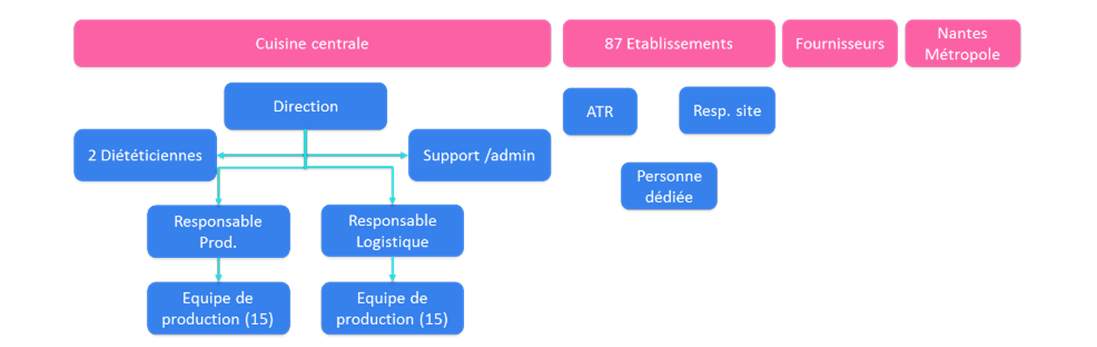

### 4 - Processus actuel

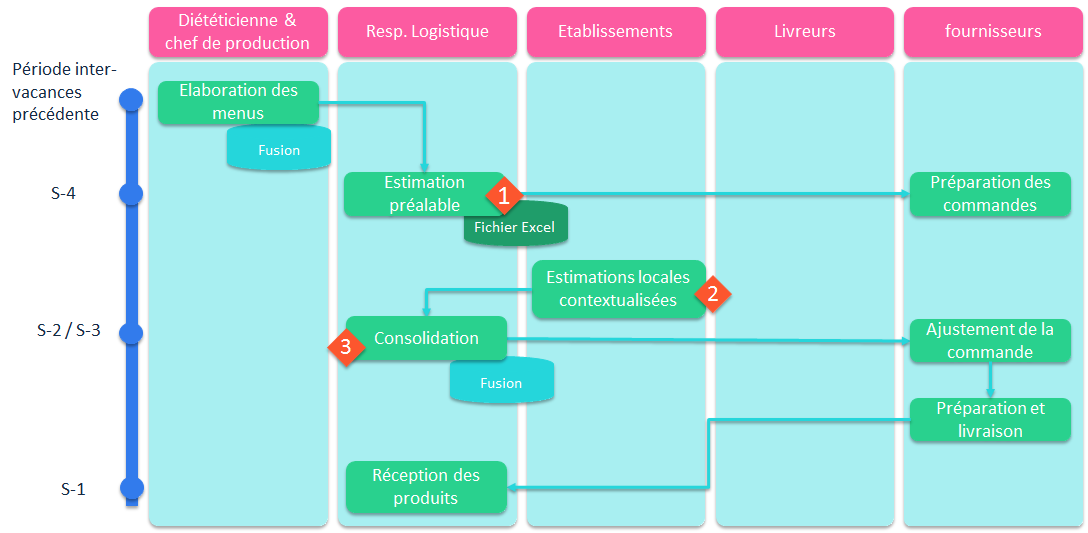

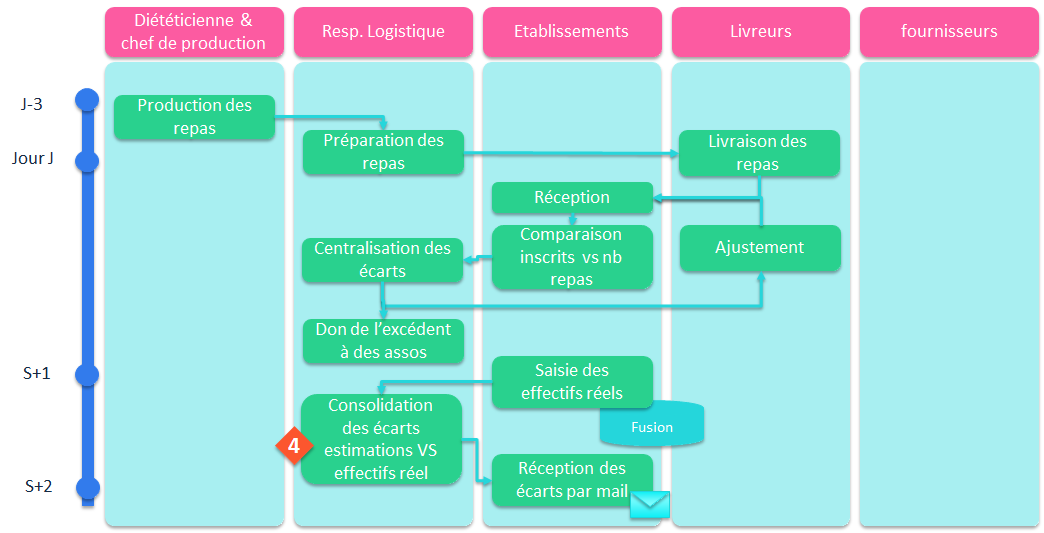

Les entêtes de colonnes indiquent les acteurs mobilisés ; 

l’axe vertical à gauche du graphique indique la position de chaque étape par rapport au jour de consommation (S = semaine et J = jour) ; 

les blocs verts indiquent les étapes du processus de planification, réalisation et suivi de la production  ; les blocs bleus indiquent les outils numériques utilisés ; 

les losanges orange indiquent les étapes auxquelles les outils de modélisation peuvent être utilisés.

Les quatre losanges mis en évidence en orange sur le schéma représentent les étapes auxquelles des interactions peuvent être développées entre l’outil de modélisation statistique et le processus de préparation des repas de la cuisine centrale à Nantes. 

Une fois les menus pour une période intervacances validés par la commission de restauration, ils sont transmis au responsable logistique. Celui-ci réalise des estimations globales de la fréquentation attendue et passe ses commandes auprès des fournisseurs locaux environ un mois à l’avance. L'objectif de votre travail est de fiabiliser cette étape (losange 1) à l'aide d'un modèle statistique.



### 5 - Votre mission 


Analyser le jeu de données afin de repérer des variables pertinentes pour la mission. 

Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. 

Nettoyer le jeu de données : identifier les colonnes inutiles (variables non pertinentes) et vérifier si toutes les lignes sont exploitables 

Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement. Variez les graphiques (boxplots, histogrammes, diagrammes circulaires, nuages de points…) pour illustrer au mieux votre propos.

Confirmer ou infirmer les hypothèses à l’aide d’une analyse multivariée (plusieurs variables). Le plus important sera de déterminer les facteurs qui jouent le plus sur la fréquentation.

Identifier des arguments justifiant la faisabilité d'une fiabilisation des commandes en utilisant un modèle statistique. Est-ce possible d'après vous ?






### 6 - Recommandation

Le nombre de repas consommés par jour dépend fortement de l’effectif global (somme des effectifs de 87 établissements), or cet effectif a évolué sur les 10 ans d’historique. 

Pour les analyses, je vous recommande de créer dans votre dataframe une colonne correspondant à la fréquentation, c’est-à-dire au nombre de repas consommés par jour divisé par l’effectif global. En analysant la fréquentation, on ne tient pas compte de l’effet d’échelle de l’effectif.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df1 = pd.read_csv("frequentation.csv")
df2 =  pd.read_csv("menus.csv")

In [3]:
df1.head()

,Unnamed: 0,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,...,fete_musulmane,ramadan,fete_chretienne,fete_juive,inc_grippe,inc_gastro,inc_varicelle,prevision,reel,effectif
0,0,2011-01-03,2010-2011,Lundi,1,Janvier,0,0,0,0,...,0,0,0,0,10505,6554,551,12289,11129,17373
1,1,2011-01-04,2010-2011,Mardi,1,Janvier,0,0,0,0,...,0,0,0,0,10505,6554,551,12558,11808,17373
2,2,2011-01-06,2010-2011,Jeudi,1,Janvier,0,0,0,0,...,0,0,1,0,10505,6554,551,12753,11741,17373
3,3,2011-01-07,2010-2011,Vendredi,1,Janvier,0,0,0,0,...,0,0,1,0,10505,6554,551,12812,12322,17373
4,4,2011-01-10,2010-2011,Lundi,2,Janvier,0,0,0,0,...,0,0,0,0,7200,6453,493,12309,11302,17373


In [4]:
df2.head()

,Unnamed: 0,date,menu,porc,viande,poisson,bio,noel,frites,an_chinois
0,0,2011-01-03,"['Pamplemousse', 'Hachis Parmentier', 'Salade ...",0,1,0,0,0,0,0
1,1,2011-01-04,"['Crêpe au fromage', 'emincé de volaille à la ...",0,1,0,0,0,0,0
2,2,2011-01-06,"['thon', 'Mâche au thon', 'Croziflette', 'des ...",1,1,0,1,0,0,0
3,3,2011-01-07,"['Choux blancs mimolette', 'milanette en des',...",0,0,1,0,0,0,0
4,4,2011-01-10,"['Endives / demi-\x9cuf', 'paella de la mer', ...",0,0,1,0,0,0,0


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       1188 non-null   int64 
 1   date             1188 non-null   object
 2   annee_scolaire   1188 non-null   object
 3   jour             1188 non-null   object
 4   semaine          1188 non-null   int64 
 5   mois             1188 non-null   object
 6   greves           1188 non-null   int64 
 7   ferie            1188 non-null   int64 
 8   veille_ferie     1188 non-null   int64 
 9   retour_ferie     1188 non-null   int64 
 10  vacances         1188 non-null   int64 
 11  retour_vacances  1188 non-null   int64 
 12  veille_vacances  1188 non-null   int64 
 13  fete_musulmane   1188 non-null   int64 
 14  ramadan          1188 non-null   int64 
 15  fete_chretienne  1188 non-null   int64 
 16  fete_juive       1188 non-null   int64 
 17  inc_grippe       1188 non-null   

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1188 non-null   int64 
 1   date        1188 non-null   object
 2   menu        1188 non-null   object
 3   porc        1188 non-null   int64 
 4   viande      1188 non-null   int64 
 5   poisson     1188 non-null   int64 
 6   bio         1188 non-null   int64 
 7   noel        1188 non-null   int64 
 8   frites      1188 non-null   int64 
 9   an_chinois  1188 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 92.9+ KB


In [7]:
df1.describe(include="O")

,date,annee_scolaire,jour,mois
count,1188,1188,1188,1188
unique,1188,10,5,11
top,2011-01-03,2012-2013,Vendredi,Septembre
freq,1,141,300,146


In [8]:
df2[df2.duplicated ()]

,Unnamed: 0,date,menu,porc,viande,poisson,bio,noel,frites,an_chinois


In [9]:
df1.describe()

,Unnamed: 0,semaine,greves,ferie,veille_ferie,retour_ferie,vacances,retour_vacances,veille_vacances,fete_musulmane,ramadan,fete_chretienne,fete_juive,inc_grippe,inc_gastro,inc_varicelle,prevision,reel,effectif
count,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000
mean,593.500000,25.842593,0.088384,0.000842,0.013468,0.021044,0.027778,0.026936,0.026094,0.022727,0.055556,0.076599,0.027778,2346.518519,4212.135522,706.073232,13696.729798,12837.773569,18890.589226
std,343.090367,15.877945,0.283972,0.029013,0.115316,0.143591,0.164405,0.161965,0.159483,0.149095,0.229158,0.266067,0.164405,4778.634345,2627.853230,1067.539442,2527.794888,2490.102028,1013.282762
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17373.000000
25%,296.750000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2179.000000,103.000000,13167.250000,12389.750000,17955.000000
50%,593.500000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,371.000000,3458.000000,415.000000,13991.000000,13184.000000,18633.000000
75%,890.250000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1910.000000,5858.000000,921.000000,14910.000000,14016.500000,19958.000000
max,1187.000000,51.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35064.000000,13855.000000,10797.000000,17989.000000,16423.000000,20685.000000


In [10]:
df2.describe()

,Unnamed: 0,porc,viande,poisson,bio,noel,frites,an_chinois
count,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000
mean,593.500000,0.137205,0.563131,0.250000,0.387205,0.006734,0.031987,0.003367
std,343.090367,0.344209,0.496207,0.433195,0.487316,0.081819,0.176038,0.057953
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,296.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,593.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,890.250000,0.000000,1.000000,0.250000,1.000000,0.000000,0.000000,0.000000
max,1187.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df1.columns

Index(['Unnamed: 0', 'date', 'annee_scolaire', 'jour', 'semaine', 'mois',
       'greves', 'ferie', 'veille_ferie', 'retour_ferie', 'vacances',
       'retour_vacances', 'veille_vacances', 'fete_musulmane', 'ramadan',
       'fete_chretienne', 'fete_juive', 'inc_grippe', 'inc_gastro',
       'inc_varicelle', 'prevision', 'reel', 'effectif'],
      dtype='object')

In [12]:
df2.columns

Index(['Unnamed: 0', 'date', 'menu', 'porc', 'viande', 'poisson', 'bio',
       'noel', 'frites', 'an_chinois'],
      dtype='object')

In [13]:
df1.annee_scolaire.value_counts()

annee_scolaire
2012-2013    141
2013-2014    141
2011-2012    139
2016-2017    131
2017-2018    131
2018-2019    131
2015-2016    125
2014-2015    109
2010-2011     91
2019-2020     49
Name: count, dtype: int64

In [14]:
df1["frequentation"] = df1.reel.div(df1.effectif)

In [15]:
df = pd.merge(df1, df2, on='date', how='inner')

In [16]:
df.columns

Index(['Unnamed: 0_x', 'date', 'annee_scolaire', 'jour', 'semaine', 'mois',
       'greves', 'ferie', 'veille_ferie', 'retour_ferie', 'vacances',
       'retour_vacances', 'veille_vacances', 'fete_musulmane', 'ramadan',
       'fete_chretienne', 'fete_juive', 'inc_grippe', 'inc_gastro',
       'inc_varicelle', 'prevision', 'reel', 'effectif', 'frequentation',
       'Unnamed: 0_y', 'menu', 'porc', 'viande', 'poisson', 'bio', 'noel',
       'frites', 'an_chinois'],
      dtype='object')

In [17]:
df.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             1188 non-null   object 
 1   annee_scolaire   1188 non-null   object 
 2   jour             1188 non-null   object 
 3   semaine          1188 non-null   int64  
 4   mois             1188 non-null   object 
 5   greves           1188 non-null   int64  
 6   ferie            1188 non-null   int64  
 7   veille_ferie     1188 non-null   int64  
 8   retour_ferie     1188 non-null   int64  
 9   vacances         1188 non-null   int64  
 10  retour_vacances  1188 non-null   int64  
 11  veille_vacances  1188 non-null   int64  
 12  fete_musulmane   1188 non-null   int64  
 13  ramadan          1188 non-null   int64  
 14  fete_chretienne  1188 non-null   int64  
 15  fete_juive       1188 non-null   int64  
 16  inc_grippe       1188 non-null   int64  
 17  inc_gastro    

In [19]:
df.drop(df[df['jour'] == 'Mercredi'].index, inplace=True)

<Axes: ylabel='Frequency'>

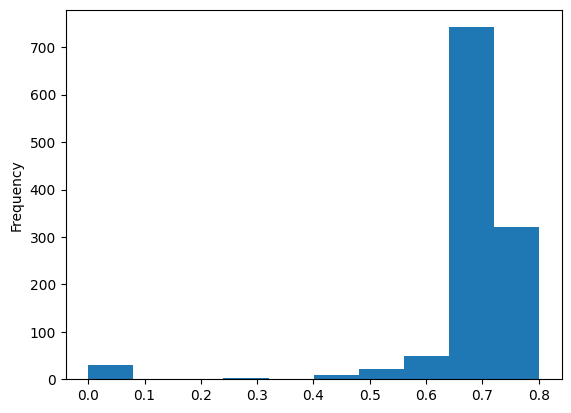

In [20]:
df.frequentation.plot.hist()

In [21]:
df.drop(df[df['frequentation'] < 0.6].index, inplace=True)

In [22]:
df.drop(df[df["greves"] == 1].index, inplace=True)

In [23]:
df.date = pd.to_datetime(df.date)
df['year'] = df.date.dt.year

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1032 entries, 0 to 1181
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             1032 non-null   datetime64[ns]
 1   annee_scolaire   1032 non-null   object        
 2   jour             1032 non-null   object        
 3   semaine          1032 non-null   int64         
 4   mois             1032 non-null   object        
 5   greves           1032 non-null   int64         
 6   ferie            1032 non-null   int64         
 7   veille_ferie     1032 non-null   int64         
 8   retour_ferie     1032 non-null   int64         
 9   vacances         1032 non-null   int64         
 10  retour_vacances  1032 non-null   int64         
 11  veille_vacances  1032 non-null   int64         
 12  fete_musulmane   1032 non-null   int64         
 13  ramadan          1032 non-null   int64         
 14  fete_chretienne  1032 non-null   int64       

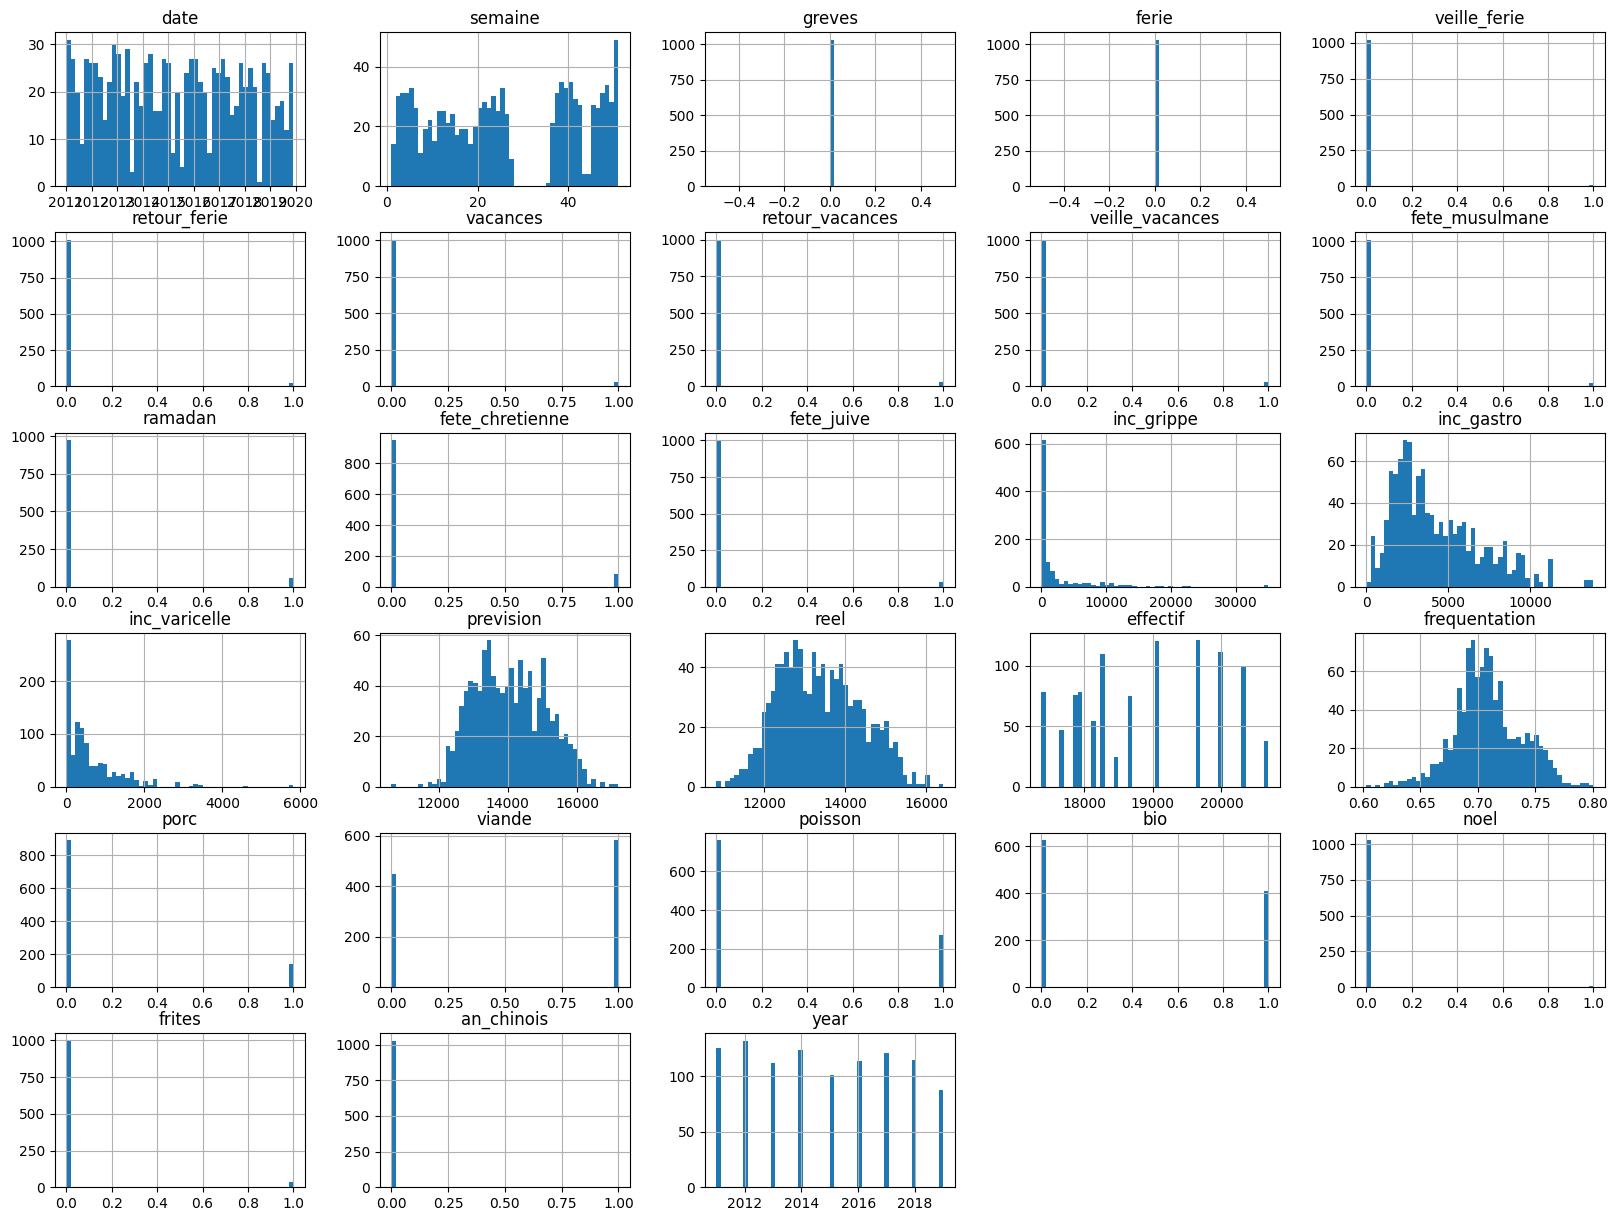

In [25]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [26]:
df.frequentation.nlargest(10)

794     0.800550
673     0.795238
1180    0.793957
751     0.791486
678     0.789730
1058    0.786129
564     0.781046
569     0.778887
1172    0.777423
1169    0.773701
Name: frequentation, dtype: float64

In [27]:
df.frequentation.nsmallest(10)

195     0.602785
1135    0.611630
543     0.619776
369     0.620670
743     0.622889
1137    0.623181
83      0.626259
870     0.627680
1084    0.630800
223     0.632025
Name: frequentation, dtype: float64

In [28]:
df.loc[[743, 83, 564, 678]].T

,743,83,564,678
date,2016-06-27 00:00:00,2011-06-20 00:00:00,2014-12-18 00:00:00,2016-01-08 00:00:00
annee_scolaire,2015-2016,2010-2011,2014-2015,2015-2016
jour,Lundi,Lundi,Jeudi,Vendredi
semaine,26,25,51,1
mois,Juin,Juin,Decembre,Janvier
greves,0,0,0,0
ferie,0,0,0,0
veille_ferie,0,0,0,0
retour_ferie,0,0,0,0
vacances,0,0,0,0


In [29]:
jour_test = pd.crosstab(df.frequentation, df.jour)
df_jour = pd.DataFrame(jour_test)
df_jour = df_jour.reset_index().rename(columns={'index': 'jour'})

df_jour
#.plot(kind = "bar",figsize =(10,6),color = ["salmon", "lightblue", "green", "yellow"])

jour,frequentation,Jeudi,Lundi,Mardi,Vendredi
0,0.602785,0,1,0,0
1,0.611630,0,1,0,0
2,0.619776,0,1,0,0
3,0.620670,1,0,0,0
4,0.622889,0,1,0,0
...,...,...,...,...,...
1003,0.789730,0,0,0,1
1004,0.791486,0,0,0,1
1005,0.793957,0,0,0,1
1006,0.795238,1,0,0,0


<Axes: xlabel='jour'>

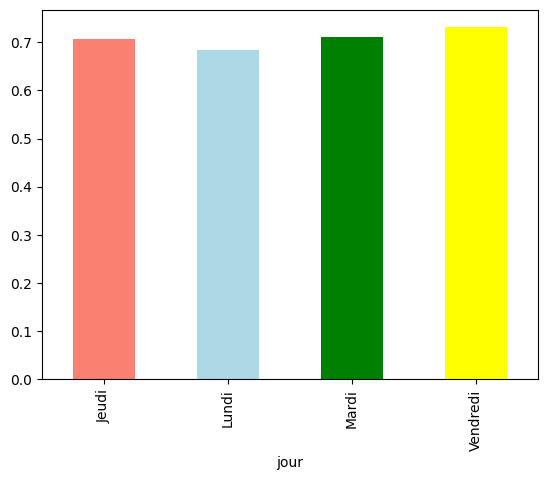

In [30]:
df.groupby("jour").frequentation.mean().plot(kind='bar', color = ["salmon", "lightblue", "green", "yellow"])

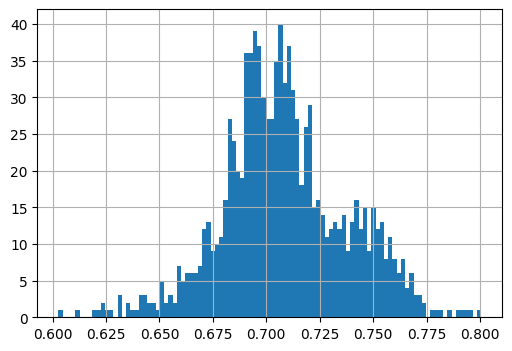

In [31]:
df.frequentation.hist(bins=100, figsize=(6,4))
plt.show()

In [32]:
numeric_columns = df.select_dtypes(include='number').columns
correlation_matrix = df[numeric_columns].corr().frequentation
correlation_matrix

semaine            0.117268
greves                  NaN
ferie                   NaN
veille_ferie      -0.025619
retour_ferie      -0.028561
vacances           0.051339
retour_vacances   -0.078546
veille_vacances    0.090162
fete_musulmane    -0.053104
ramadan           -0.071602
fete_chretienne    0.013054
fete_juive        -0.022271
inc_grippe        -0.053728
inc_gastro         0.180839
inc_varicelle      0.013383
prevision          0.572986
reel               0.746935
effectif           0.287768
frequentation      1.000000
porc              -0.161580
viande            -0.470253
poisson            0.432585
bio                0.141612
noel               0.174233
frites             0.033694
an_chinois        -0.020906
year               0.287627
Name: frequentation, dtype: float64

In [33]:
#Anova
import statsmodels.api as sm
import statsmodels.formula.api as smf
reg_multi = smf.ols('reel~effectif+mois+poisson+viande+noel+bio', data=df).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                   reel   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     418.5
Date:                Wed, 19 Jul 2023   Prob (F-statistic):               0.00
Time:                        10:28:56   Log-Likelihood:                -7587.8
No. Observations:                1032   AIC:                         1.521e+04
Df Residuals:                    1016   BIC:                         1.529e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2579.1112    238.37

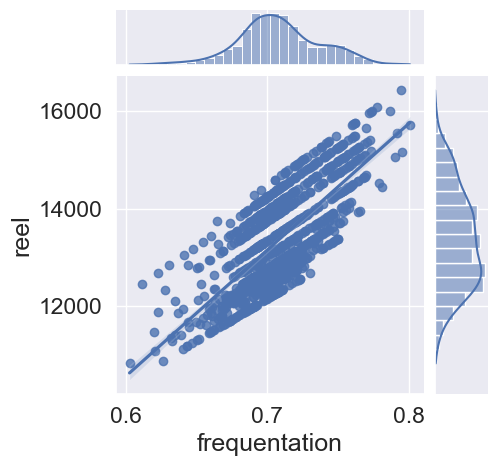

In [34]:
sns.set(font_scale = 1.5)
sns.jointplot(data=df, x="frequentation", y="reel", kind="reg", height=5)
plt.show()

In [35]:
'''
plt.figure(figsize=(6,4))
sns.set(font_scale=1.5, palette="viridis")
sns.countplot(data=df, x="frequentation", hue="reel")
plt.legend(loc=1)
plt.show()
'''

'\nplt.figure(figsize=(6,4))\nsns.set(font_scale=1.5, palette="viridis")\nsns.countplot(data=df, x="frequentation", hue="reel")\nplt.legend(loc=1)\nplt.show()\n'

In [36]:
# Turn all of the string value into a category
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [37]:
#Turn categorical variables into numbers
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = pd.Categorical(content).codes+1

In [38]:
len (df)

1032

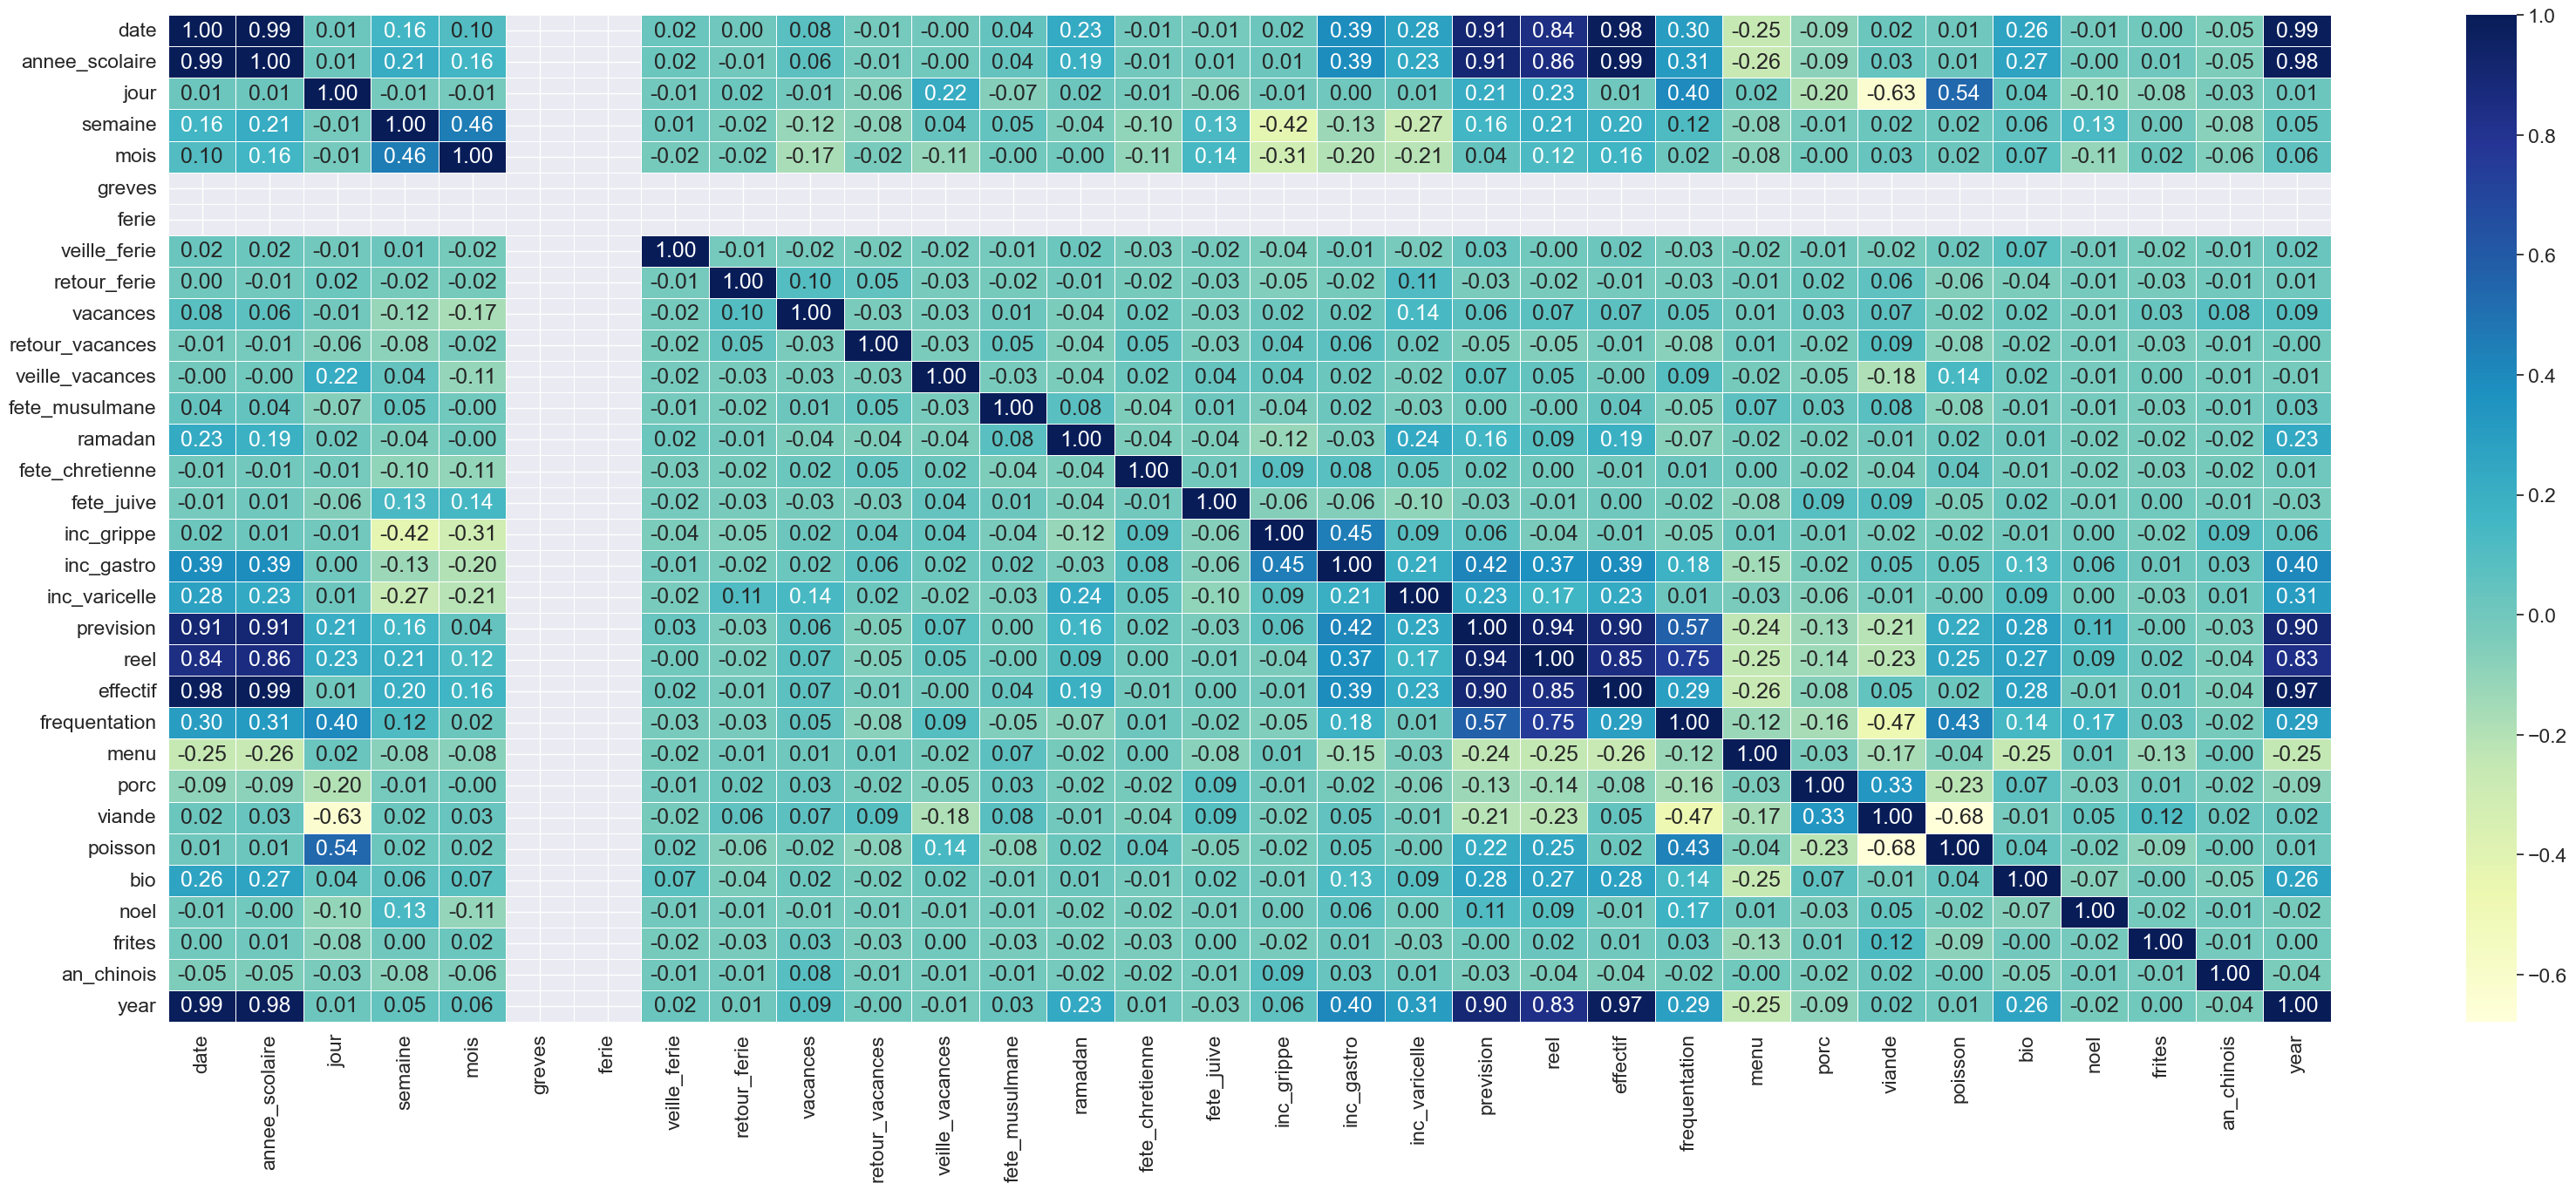

In [39]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(40,15))
ax = sns.heatmap(corr_matrix, annot=True, linewidth=0.5,fmt=".2f", cmap="YlGnBu")

In [40]:
df.corr()["reel"]

date               0.843709
annee_scolaire     0.857124
jour               0.225105
semaine            0.205755
mois               0.124337
greves                  NaN
ferie                   NaN
veille_ferie      -0.000948
retour_ferie      -0.023344
vacances           0.074298
retour_vacances   -0.051794
veille_vacances    0.046521
fete_musulmane    -0.002719
ramadan            0.094529
fete_chretienne    0.001832
fete_juive        -0.010419
inc_grippe        -0.035046
inc_gastro         0.366512
inc_varicelle      0.166086
prevision          0.936732
reel               1.000000
effectif           0.851157
frequentation      0.746935
menu              -0.248725
porc              -0.140552
viande            -0.226132
poisson            0.253881
bio                0.272724
noel               0.091273
frites             0.024873
an_chinois        -0.041516
year               0.831895
Name: reel, dtype: float64

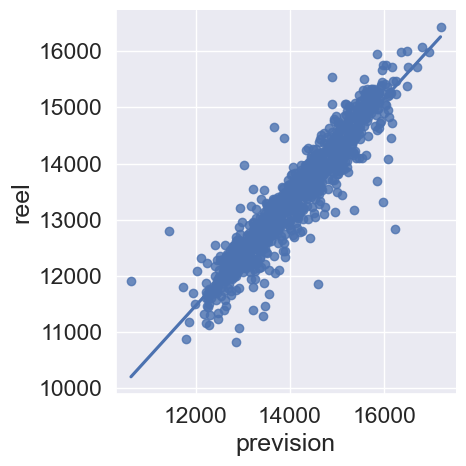

In [41]:
sns.lmplot(x="prevision", y="reel",data=df ,fit_reg=True, ci=None) 

### Regression Linear

In [42]:
train = df[df["year"] < 2018].copy()
test = df[df["year"] >= 2018].copy()

In [43]:
train.shape

(829, 32)

In [44]:
test.shape

(203, 32)

In [45]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()


In [46]:
predictors = ["prevision","effectif"]
target = "reel"

In [47]:
reg.fit(train[predictors], train["reel"])

LinearRegression()

In [48]:
predictions = reg.predict(test[predictors])

In [49]:
test["predictions"] = predictions
test

,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,vacances,...,menu,porc,viande,poisson,bio,noel,frites,an_chinois,year,predictions
930,830,8,2,2,4,0,0,0,0,0,...,32,0,1,0,0,0,0,0,2018,13948.822469
931,831,8,3,2,4,0,0,0,0,0,...,157,0,1,0,1,0,0,0,2018,14214.172923
932,832,8,1,2,4,0,0,0,0,0,...,758,0,1,0,0,0,0,0,2018,14440.628360
933,833,8,4,2,4,0,0,0,0,0,...,451,0,0,1,0,0,0,0,2018,15093.200324
934,834,8,2,3,4,0,0,0,0,0,...,586,1,1,0,1,0,0,0,2018,14016.240500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,1028,10,2,48,9,0,0,0,0,0,...,374,0,0,0,1,0,0,0,2019,15104.020724
1178,1029,10,3,48,9,0,0,0,0,0,...,109,0,1,0,1,0,0,0,2019,15075.497711
1179,1030,10,1,48,9,0,0,0,0,0,...,440,0,1,0,1,0,0,0,2019,15062.532705
1180,1031,10,4,48,9,0,0,0,0,0,...,248,0,0,1,1,0,0,0,2019,16245.805578


In [50]:
test["predictions"] = test["predictions"].round()
test

,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,vacances,...,menu,porc,viande,poisson,bio,noel,frites,an_chinois,year,predictions
930,830,8,2,2,4,0,0,0,0,0,...,32,0,1,0,0,0,0,0,2018,13949.0
931,831,8,3,2,4,0,0,0,0,0,...,157,0,1,0,1,0,0,0,2018,14214.0
932,832,8,1,2,4,0,0,0,0,0,...,758,0,1,0,0,0,0,0,2018,14441.0
933,833,8,4,2,4,0,0,0,0,0,...,451,0,0,1,0,0,0,0,2018,15093.0
934,834,8,2,3,4,0,0,0,0,0,...,586,1,1,0,1,0,0,0,2018,14016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,1028,10,2,48,9,0,0,0,0,0,...,374,0,0,0,1,0,0,0,2019,15104.0
1178,1029,10,3,48,9,0,0,0,0,0,...,109,0,1,0,1,0,0,0,2019,15075.0
1179,1030,10,1,48,9,0,0,0,0,0,...,440,0,1,0,1,0,0,0,2019,15063.0
1180,1031,10,4,48,9,0,0,0,0,0,...,248,0,0,1,1,0,0,0,2019,16246.0


In [51]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(test["reel"], test["predictions"])

In [52]:
error

295.2216748768473

In [53]:
df.describe()["reel"]

count     1032.000000
mean     13370.219961
std       1012.021175
min      10823.000000
25%      12580.750000
50%      13292.500000
75%      14099.000000
max      16423.000000
Name: reel, dtype: float64

In [54]:
errors = (test["reel"] - test["predictions"]).abs()
errors

930      95.0
931      70.0
932     217.0
933     281.0
934     181.0
        ...  
1177     39.0
1178    879.0
1179    199.0
1180    177.0
1181     73.0
Length: 203, dtype: float64

In [55]:
errors_by_year = errors.groupby(test["year"]).mean()
errors_by_year

year
2018    240.982609
2019    366.102273
dtype: float64

### Ridge regression

In [56]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
np.random.seed(42)
x = df.drop("reel", axis = 1)
y = df["reel"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2)
model = Ridge()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9538082841966924

### Ridge Regression.2

In [61]:
import sklearn.model_selection 
train, test = train_test_split(df, test_size=.2, random_state=1)

In [62]:
predictors = ["prevision","effectif"]
target ="reel"

In [70]:
X = train[predictors].copy()
y = train[target].copy()

In [71]:
x_mean = x.mean()
x_std = x.std()

In [72]:
X = (X-x_mean) / x_std
X.describe()

,prevision,effectif
count,825.000000,825.000000
mean,14080.836364,18867.990303
std,1027.862943,985.084472
min,10625.000000,17373.000000
25%,13291.000000,17955.000000
50%,14042.000000,18633.000000
75%,14889.000000,19639.000000
max,17201.000000,20685.000000


### RandomForestRegressor

In [57]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9853498521745241

### RandomForestClassifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators =100)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.0